### Introduction to working with the pre-processed SAI simulations archive

See github repo here https://github.com/alistairduffey/SAI_pp_archive
and data here https://zenodo.org/records/14802397

Alistair Duffey, January 2025

This notebook shows some siple usage of the data, to plot world maps and timeseries of some common output variables, for the ARISE and G6sulfur simulations across various climate models. 

In [2]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import xarray as xr

/home/users/a_duffey/.conda/envs/cmipv2/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)



For the maps below we'll compare 3 different cases:
- **ssp245_baselin**: The 1.5°C warmer than pre-industrial world, which SAI will target. 2013-2022 in UKESM.
- **ssp245**: the late 21st century in our global warming scenario: 2050 - 2069 in the control experiment. This is the future under moderate/high GHG emissions and global warming. 
- **ARISE**: the late 21st century in our stratospheric aerosol geoengineering experiment: 2050-2069 in the feedback-controlled SAI experiment, ARISE, which branches from SSP2-4.5 in 2035.


In [3]:
# let's define a function to read in data.
# the inputs here reflect the directory structure of the archive 

def get_data(group, model, window, table, variable, season='annual', mean_or_std='mean'):
    # group: 'ARISE', 'GeoMIP'
    # model: if group=='ARISE': UKESM1-0-LL or CESM2-WACCM; 
    ######## if group='GeoMIP': any of the 6 G6 models
    # window: if group =='ARISE': ['SSP245_background', 'SSP245_baseline', 'ARISE_assmt']
    ######### if group =='GeoMIP': ['G6sulfur_assmt', 'SSP245_baseline', 'SSP245_target', 'SSP585_background']
    # table: 'Amon', 'Omon', 'Lmon'
    # variable: many
    # season: 'annual', 'DJF', 'MAM', 'JJA', or 'SON'
    # mean_or_std: 'mean' or 'std'
    
    path = 'pp_archive/{a}/{b}/maps/{c}/{d}/{e}/{f}/*_{g}_*.nc'.format(a=group, b=model, c=window,
                                                                       d=table, e=variable,
                                                                       f=mean_or_std, g=season)
    data = xr.open_mfdataset(path)
    return data

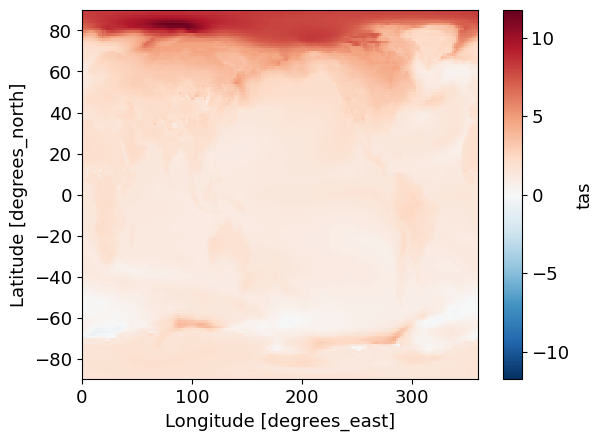

In [4]:
ssp245 = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_background', table='Amon',
                  variable='tas', mean_or_std='mean', season='annual')
baseline = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_baseline', table='Amon',
                  variable='tas', mean_or_std='mean', season='annual')
ARISE = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='ARISE_assmt', table='Amon',
                  variable='tas', mean_or_std='mean', season='annual')

## check plot:
(ssp245 - baseline)['tas'].plot()

/tmp/ipykernel_1300/3773394057.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space, often useful.


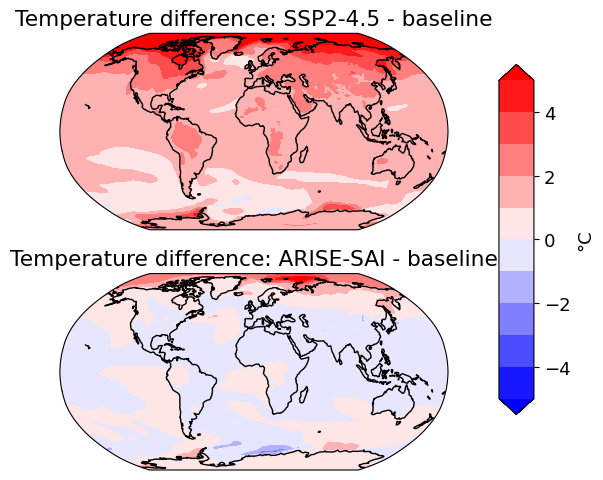

In [5]:
var = 'tas'

ssp245 = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_background', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
baseline = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_baseline', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
ARISE = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='ARISE_assmt', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')


data_to_plot_1 = (ssp245 - baseline)[var]
data_to_plot_2 = (ARISE - baseline)[var]

lats1 = data_to_plot_1.y
lats2 = data_to_plot_2.y
lats = [lats1, lats2]

data_to_plot_1, lons1 = add_cyclic_point(data_to_plot_1, data_to_plot_1.x)
data_to_plot_2, lons2 = add_cyclic_point(data_to_plot_2, data_to_plot_2.x)
lons = [lons1, lons2]

scenarios = ['SSP2-4.5', 'ARISE-SAI']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7,5), 
                        subplot_kw={'projection': ccrs.Robinson()})

i=0
for d in [data_to_plot_1, data_to_plot_2]:    
    p = axs[i].contourf(lons[i], lats[i], d, 
                 transform=ccrs.PlateCarree(),
                 cmap='bwr',
                 levels = np.arange(-5, 6, 1),
                  extend='both'      
                         )

    axs[i].coastlines()
    axs[i].set_title('Temperature difference: {} - baseline'.format(scenarios[i]))
    i=i+1


### Add a colorbar
# Adjust the layout to make room for the colorbar on the right
plt.subplots_adjust(right=0.8, hspace=0.4)
# Create a colorbar to the right of the subplots
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # (left, bottom, width, height)
cbar = plt.colorbar(p, cax=cax, orientation='vertical', label='°C')

plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space, often useful. 
plt.show()

## Plotting hydrological change

/tmp/ipykernel_1300/3623648268.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space


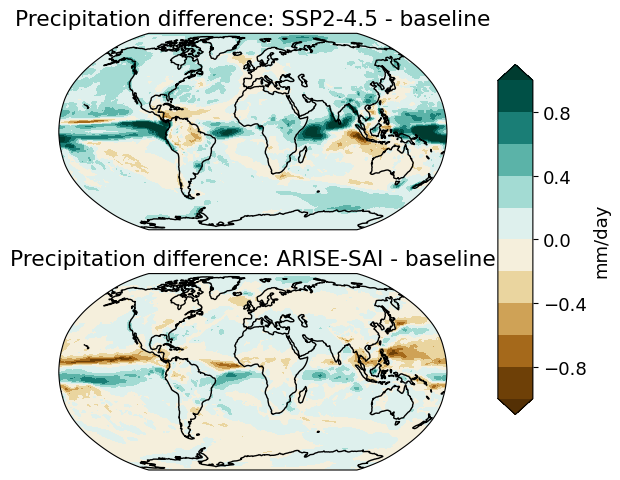

In [6]:
var = 'pr'

ssp245 = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_background', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
baseline = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='SSP245_baseline', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')
ARISE = get_data(group='ARISE', model='UKESM1-0-LL', 
                  window='ARISE_assmt', table='Amon',
                  variable=var, mean_or_std='mean', season='annual')


unit_conversion_pr = 86400
data_to_plot_1 = (ssp245 - baseline)[var]*unit_conversion_pr
data_to_plot_2 = (ARISE - baseline)[var]*unit_conversion_pr

lats1 = data_to_plot_1.y
lats2 = data_to_plot_2.y
lats = [lats1, lats2]

data_to_plot_1, lons1 = add_cyclic_point(data_to_plot_1, data_to_plot_1.x)
data_to_plot_2, lons2 = add_cyclic_point(data_to_plot_2, data_to_plot_2.x)
lons = [lons1, lons2]

scenarios = ['SSP2-4.5', 'ARISE-SAI']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7,5), 
                        subplot_kw={'projection': ccrs.Robinson()})

i=0
for d in [data_to_plot_1, data_to_plot_2]:    
    p = axs[i].contourf(lons[i], lats[i], d, 
                 transform=ccrs.PlateCarree(),
                 cmap='BrBG',
                 levels = np.arange(-1, 1.2, 0.2),
                  extend='both'      
                         )

    axs[i].coastlines()
    axs[i].set_title('Precipitation difference: {} - baseline'.format(scenarios[i]))
    i=i+1


### Add a colorbar
# Adjust the layout to make room for the colorbar on the right
plt.subplots_adjust(right=0.8, hspace=0.4)
# Create a colorbar to the right of the subplots
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # (left, bottom, width, height)
cbar = plt.colorbar(p, cax=cax, orientation='vertical', label='mm/day')
plt.tight_layout() # this call tightens up the arrangement of subplots to lose white space 

plt.show()


### Plotting timeseries

In [7]:
def get_timeseries(group, model, region, table, variable, scenario):
    # group: 'ARISE', 'GeoMIP'
    # model: if group=='ARISE': UKESM1-0-LL or CESM2-WACCM; 
    ######## if group='GeoMIP': any of the 6 G6 models
    # region: 'global', 'land' or 'ocean'
    # table: 'Amon', 'Omon', 'Lmon'
    # variable: many
    # scenario if group=='ARISE': ARISE or SSP245; 
    ######## if group='GeoMIP': 'G6sulfur', 'SSP245' or 'SSP585'
    try: 
        path = 'pp_archive/{a}/{b}/timeseries/{c}/{d}/{e}/*_{f}_*.nc'.format(a=group, b=model, 
                                                                             c=region, d=table, 
                                                                             e=variable, f=scenario)
        data = xr.open_mfdataset(path)
    except:
        if model == 'CESM2-WACCM' and group=='ARISE':
            CESM_var = CESMize_var_names(variable, variable_names_dict)
            path = 'pp_archive/{a}/{b}/timeseries/{c}/{d}/{e}/*_{f}_*.nc'.format(a=group, b=model, 
                                                                             c=region, d=table, 
                                                                             e=CESM_var, f=scenario)
            data = xr.open_mfdataset(path).rename({CESM_var:variable})
        else:
            print('no data for this model/scenario/variable combination')
    return data


## Note that CESM2-WACCM ARISE data, unlike all the others, is not CMOR-ized
## so we need a helper functions to translate variable names from CESM versions to CMOR versions
variable_names_dict = {'tas':'TREFHT',
                       'pr':'PRECT',
                       'tasmax':'TREFHTMX',
                       'tasmin':'TREFHTMN',
                       'rsds':'FSDS'}
def CESMize_var_names(cmor_var, variable_names_dict):
    return variable_names_dict[cmor_var]

## NB - will also need a dict of conversion factors for CESM to CMOR vars

In [8]:
# also define a processing function to resample to yearly resolution, with month-length weighting
def weighted_annual_resample(ds):
    """
    weight by days in each month
    adapted from NCAR docs 
    https://ncar.github.io/esds/posts/2021/yearly-averages-xarray/
    """
    # dont return mean values for incomplete years
    months_per_year = ds.time.dt.month.groupby(ds.time.dt.year).count()
    complete_years = months_per_year == 12
    valid_years = complete_years[complete_years].year.values
    ds_filtered = ds.sel(time=ds.time.dt.year.isin(valid_years))

    # Recompute weights for the filtered dataset
    month_length_filtered = ds_filtered.time.dt.days_in_month
    wgts_filtered = month_length_filtered.groupby("time.year") / month_length_filtered.groupby("time.year").sum()

    # Compute weighted annual mean
    numerator = (ds_filtered * wgts_filtered).resample(time="YS").sum(dim="time")
    denominator = wgts_filtered.resample(time="YS").sum(dim="time")

    return numerator / denominator

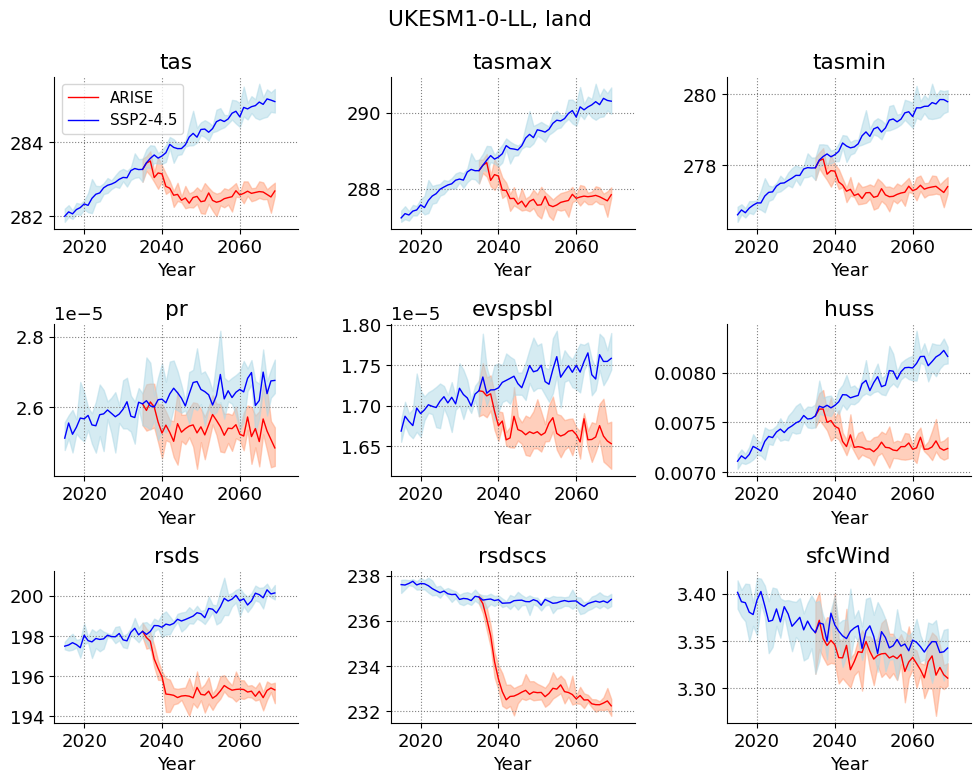

In [9]:
## plot global spatial mean timeseries:

import matplotlib
matplotlib.rcParams.update({'font.size': 13})

## OPTIONS
variables = ['tas', 'tasmax', 'tasmin', 
             'pr', 'evspsbl', 'huss',
             'rsds', 'rsdscs', 'sfcWind']
model = 'UKESM1-0-LL'
region = 'land'


## 
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
i=0
for ax in axs.flatten():
    var = variables[i]

    # plot arise
    ds = get_timeseries(group='ARISE', model=model, region=region, 
               table='Amon', variable=var, scenario='ARISE')
    ds = weighted_annual_resample(ds).sel(time=slice('2015', '2069'))
    max_, min_, mean_ = ds.max('Ensemble_member'), ds.min('Ensemble_member'), ds.mean('Ensemble_member')
    ax.plot(mean_.time.dt.year.values, 
            mean_[var].values,
            color = 'red', lw=1, label='ARISE')
    ax.fill_between(max_.time.dt.year.values, min_[var].values, max_[var].values, 
                color='lightsalmon', alpha=0.5)

    
    # repeat for ssp245
    ds = get_timeseries(group='ARISE', model=model, region=region, 
               table='Amon', variable=var, scenario='SSP245')
    ds = weighted_annual_resample(ds).sel(time=slice('2015', '2069'))
    max_, min_, mean_ = ds.max('Ensemble_member'), ds.min('Ensemble_member'), ds.mean('Ensemble_member')
    ax.plot(mean_.time.dt.year.values, 
            mean_[var].values,
            color = 'blue', lw=1, label='SSP2-4.5')
    ax.fill_between(max_.time.dt.year.values, min_[var].values, max_[var].values, 
                color='lightblue', alpha=0.5)

    if i== 0:
        ax.legend(fontsize='small')
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlim(None, 2075)
    ax.set_title(var)
    ax.set_xlabel('Year')
    ax.grid(ls='dotted', color='gray')
    i=i+1

plt.suptitle('{m}, {r}'.format(m=model, r=region))
plt.tight_layout()
plt.show()

/home/users/a_duffey/.conda/envs/cmipv2/lib/python3.12/site-packages/xarray/coding/times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/users/a_duffey/.conda/envs/cmipv2/lib/python3.12/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
/home/users/a_duffey/.conda/envs/cmipv2/lib/python3.12/site-packages/xarray/coding/times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/users/a_

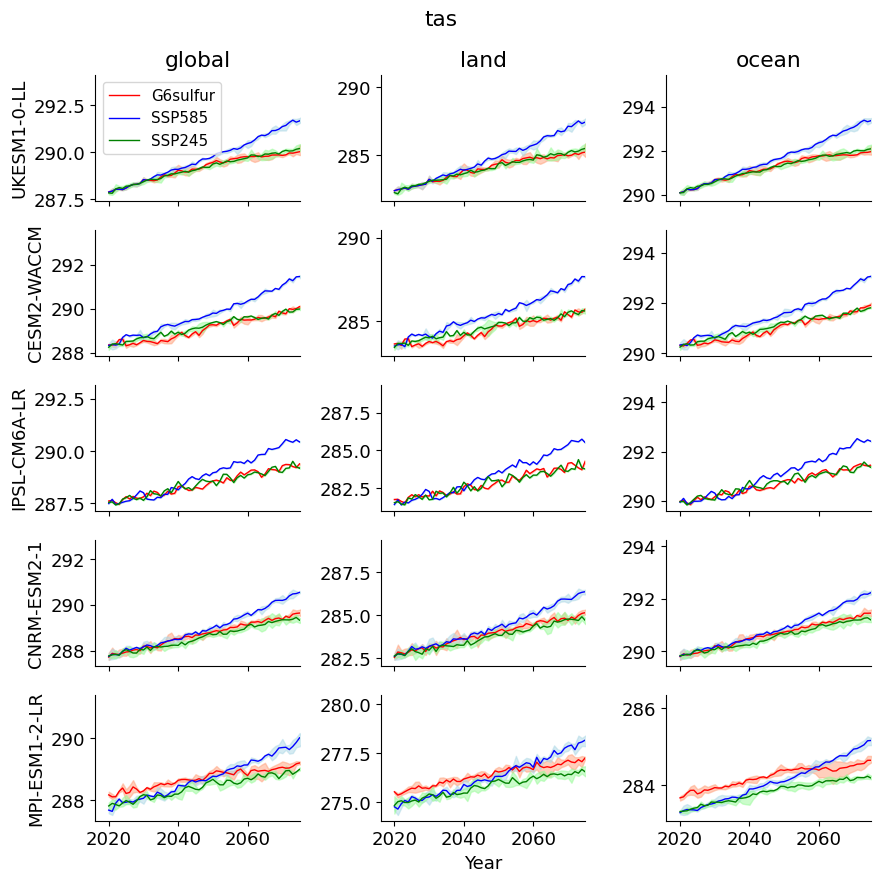

'\nThe plot shows global, land, and ocean, time series for the title variable, for each of the 5 G6sulfur models, listed. The shaded region shows the ensemble range in each case (note that IPSL has only one member) and the line the ensemble mean.'

In [24]:
### finally, also plot a multi-model assessment for a given variable, using G6 data:

## plot global spatial mean timeseries:

import matplotlib
matplotlib.rcParams.update({'font.size': 13})

## OPTIONS
var = 'tas'
models = ['UKESM1-0-LL', 'CESM2-WACCM', 'IPSL-CM6A-LR', 'CNRM-ESM2-1', 'MPI-ESM1-2-LR']
regions = ['global', 'land', 'ocean']



fig, axs = plt.subplots(nrows=5, ncols=3, 
                        sharex='col',
                        figsize=(9, 9))
i=0
j=0
for ax in axs.flatten():
    region = regions[i % 3]
    model = models[j]
    # plot arise
    scenarios = ['G6sulfur', 'SSP585', 'SSP245']
    main_colors = ['red', 'blue', 'green']
    light_colors = ['lightsalmon', 'lightblue', 'palegreen']
    k=0
    
    for scenario in scenarios:
        ds = get_timeseries(group='GeoMIP', model=model, region=region, 
                   table='Amon', variable=var, scenario=scenario)
        ds = weighted_annual_resample(ds).sel(time=slice('2020', '2099'))
        max_, min_, mean_ = ds.max('Ensemble_member'), ds.min('Ensemble_member'), ds.mean('Ensemble_member')
        ax.plot(mean_.time.dt.year.values, 
                mean_[var].values,
                color = main_colors[k], lw=1, label=scenario)
        ax.fill_between(max_.time.dt.year.values, min_[var].values, max_[var].values, 
                    color=light_colors[k], alpha=0.5)
        k=k+1
    
    if i== 0:
        ax.legend(fontsize='small')
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlim(None, 2075)
    #ax.grid(ls='dotted', color='gray')
    if j==0:
        ax.set_title(region)
    if region == 'global':
        ax.set_ylabel(model, rotation=90)
    if region == 'ocean':
        j=j+1
    if j==4 and region =='land':
        ax.set_xlabel('Year')
    i=i+1

plt.suptitle('{}'.format(var))
plt.tight_layout()
plt.show()

"""
The plot shows global, land, and ocean, time series for the title variable, 
for each of the 5 G6sulfur models, listed. The shaded region shows the ensemble
range in each case (note that IPSL has only one member) and the line the ensemble mean.
""" 